This document's purpose is to fulfill the Narrative Analytics and Experimentation assignement for Thinkful.

Thinkful Prep Course
Author: Sean Lamont
Mentor: Pavitraa Parthasarathy
Date: 2017/11/29

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
cc = pd.read_csv('creditcard.csv')
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Experimental Hypothesis

Businesses can savemoney by targeting pre-authorizations of credit card payments based on the transaction amount.

### Analysis

First, let's take a look at the difference in fraudulent and legitimate transactions. Fraudulent transactions are denoted as 1's while legitimate transactions are denoted as 0's.

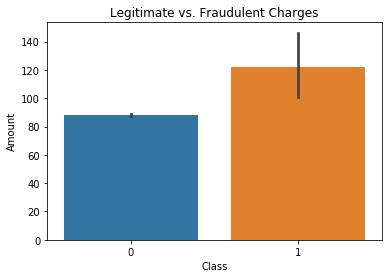

In [26]:
sns.barplot(data = cc, x = 'Class', y = 'Amount')
plt.title('Legitimate vs. Fraudulent Charges')
plt.xticks()
plt.show()

This graph shows us that fraudulent payments are more likely to to be of higher value than legitimate payments. To take a closer look at the differences between these two, we can look at the number of transactions and the average value for each category.



   Payment Status  Count of Status
0               0           284315
1               1              492




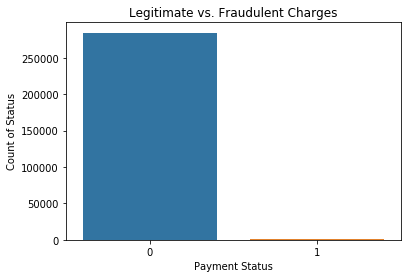



   Payment Status  Average Amount
0               0       88.291022
1               1      122.211321




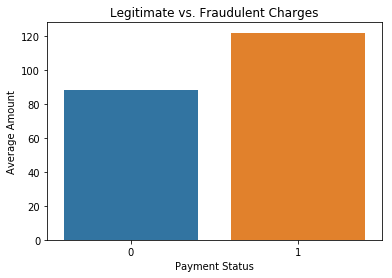

In [63]:
ftable = cc[['Class','Amount']].groupby('Class').agg('count').reset_index()
avgtable = cc[['Class','Amount']].groupby('Class').mean().reset_index()
ftable.columns = ['Payment Status','Count of Status']
avgtable.columns = ['Payment Status','Average Amount']

print("\n")
print(ftable)
print("\n")

sns.barplot(data = ftable, x = 'Payment Status', y = 'Count of Status')
plt.title('Legitimate vs. Fraudulent Charges')
plt.xticks()
plt.show()

print("\n")
print(avgtable)
print("\n")

sns.barplot(data = avgtable, x = 'Payment Status', y = 'Average Amount')
plt.title('Legitimate vs. Fraudulent Charges')
plt.xticks()
plt.show()
print("\n")

It appears that the number of fruadulent transactions is much smaller than legitimate charges. As a percentage, fraudulent charges represent .17% of all transaction. This means that 99.83% of transactions are legitimate.

Additionally, the average amount per transaction for fraudulent charges is on average ~€40 higher than legitimate transactions.

### Role out plan

The plan will be to run pre-authorization on all transactions over €122. The variable of interest is whether or not those transactions pass or fail pre-authorization. This is an A/B test for transactions that are above and below €122.

We should run the experiment for 3 months with the expecation that the data gathering will take 6 months. Charge backs typically show up within a 90 day window, so we will be able to fully gather the data by the end of the testing window.

Results will be finalized after the conclusion of the 6 month window.

### Evaluation plan

Evaluation of the data will look to compare the percentage of transactions that were flagged for fraud using the pre-authorization parameters (>€122 category), and compare it with the transactions that pre-authorization is not run on (<€122 category).

Additionally, we will look at the average amounts for pre-auth vs. non pre-auth transactions and compare the two. This will inform us of the accuracy of our test, and can help us fine tune the paramaters at which we decide to pre-auth a card on. 

As a bonus, we can look at the time between transactions, to determine if fraudulent charges occur in shorter or longer windows, compared to legitimate transactions. If there is a statistically significant difference, then we can again fine tune the pre-auth system.

Success in this experiment will:

>Give us good data to work with.

>Help us answer our hypothesis.

>Guide our decision making on how to further improve the system that we will use to fight fraud.

It could also mean:

>The hypothesis was wrong.

>This system does not improve our business, therefore, we should discontinue it.